In [1]:
!nvidia-smi

Sun Dec  1 17:45:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 28.7 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-1 in yolov11:: 100%|██████████| 1338/1338 [00:00<00:00, 1592.31it/s]


In [7]:
dataset.location

'/content/football-players-detection-1'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [10]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11m.pt" epochs=100 imgsz=800

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/football-players-detection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

**Step # 05 Examine Training Results**

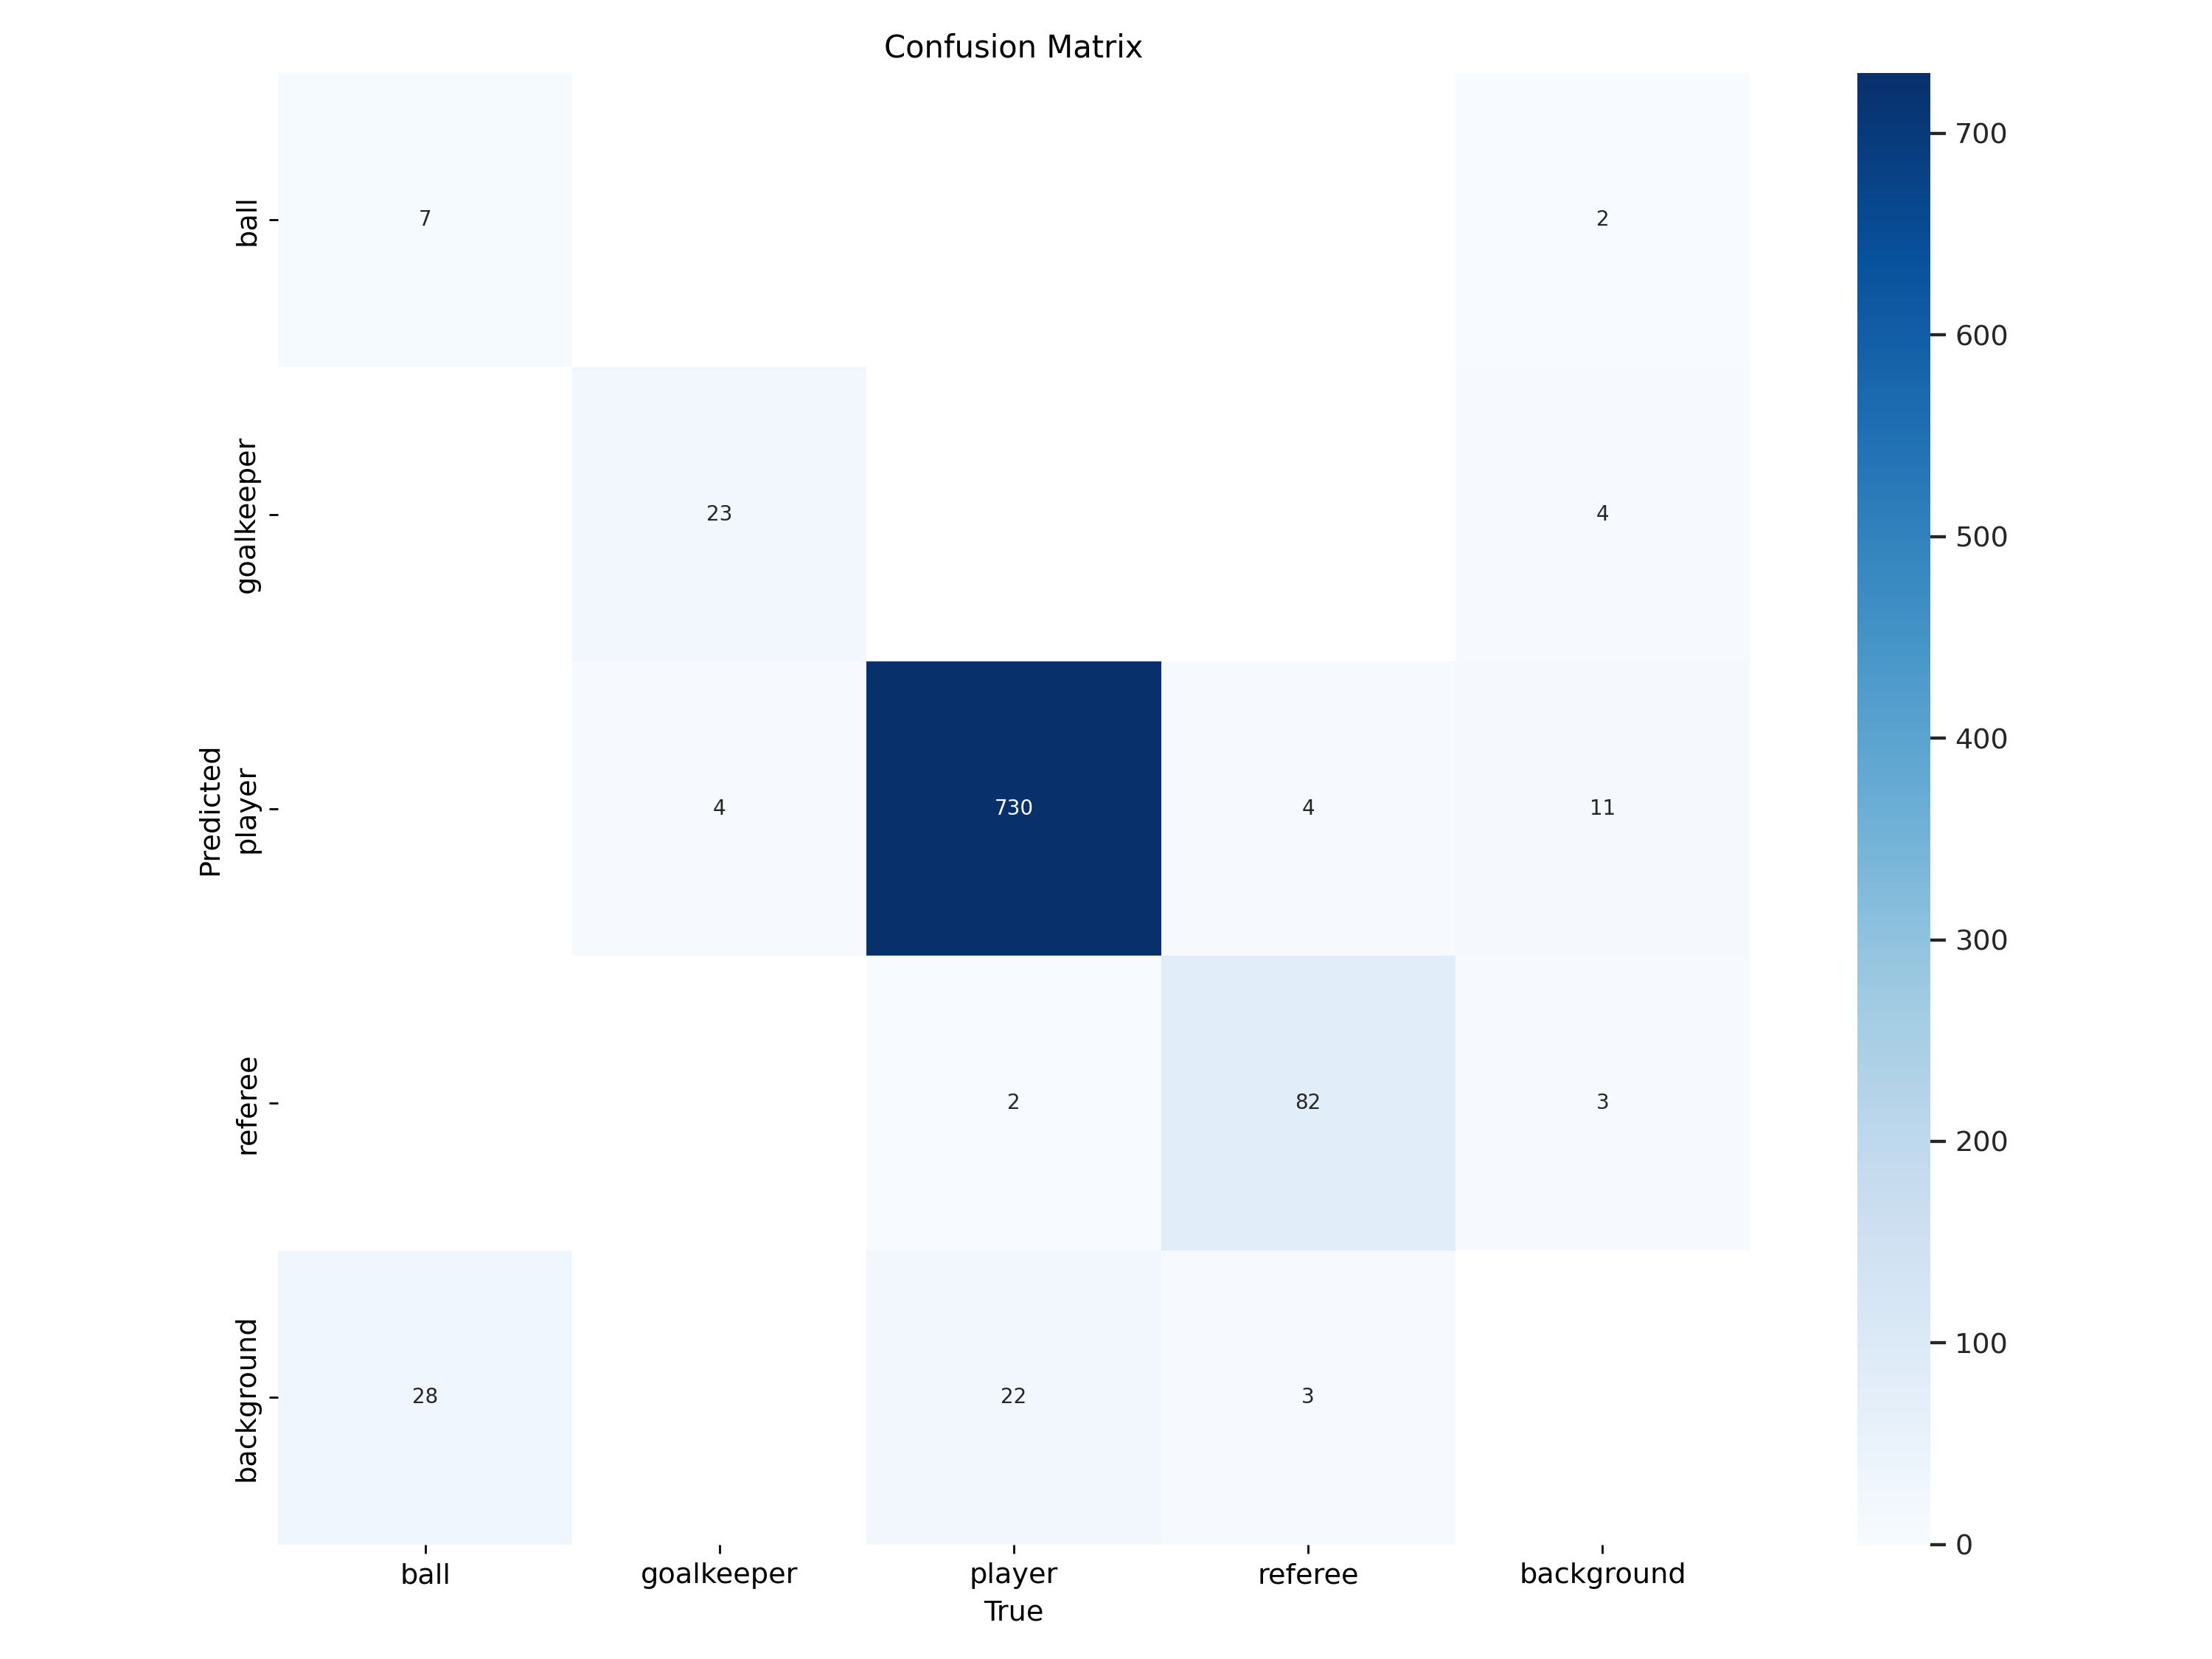

In [13]:
Image("/content/runs/detect/train3/confusion_matrix.png", width=600)

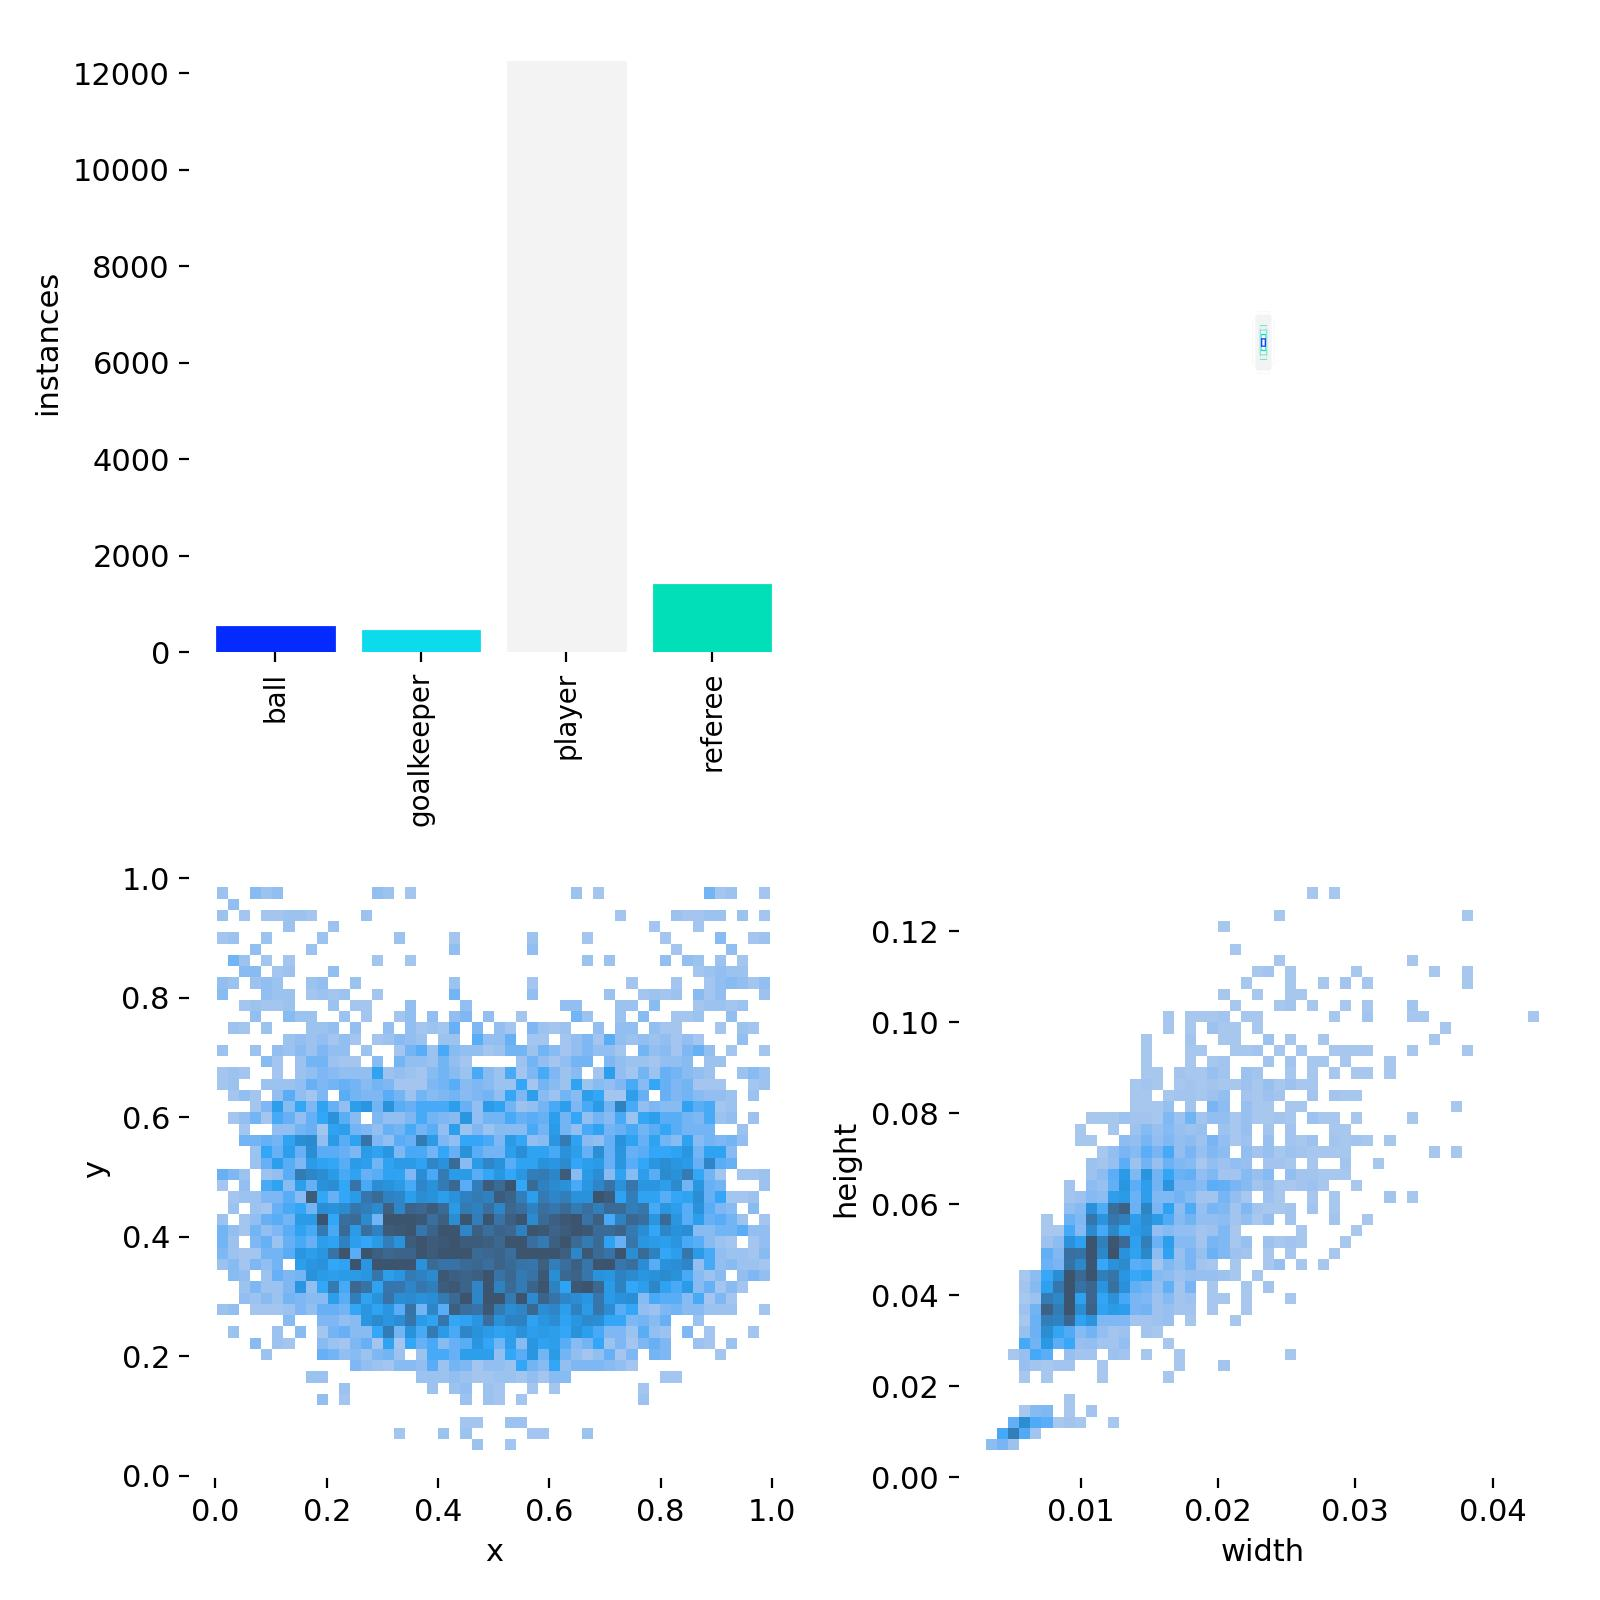

In [15]:
Image("/content/runs/detect/train3/labels.jpg", width=600)

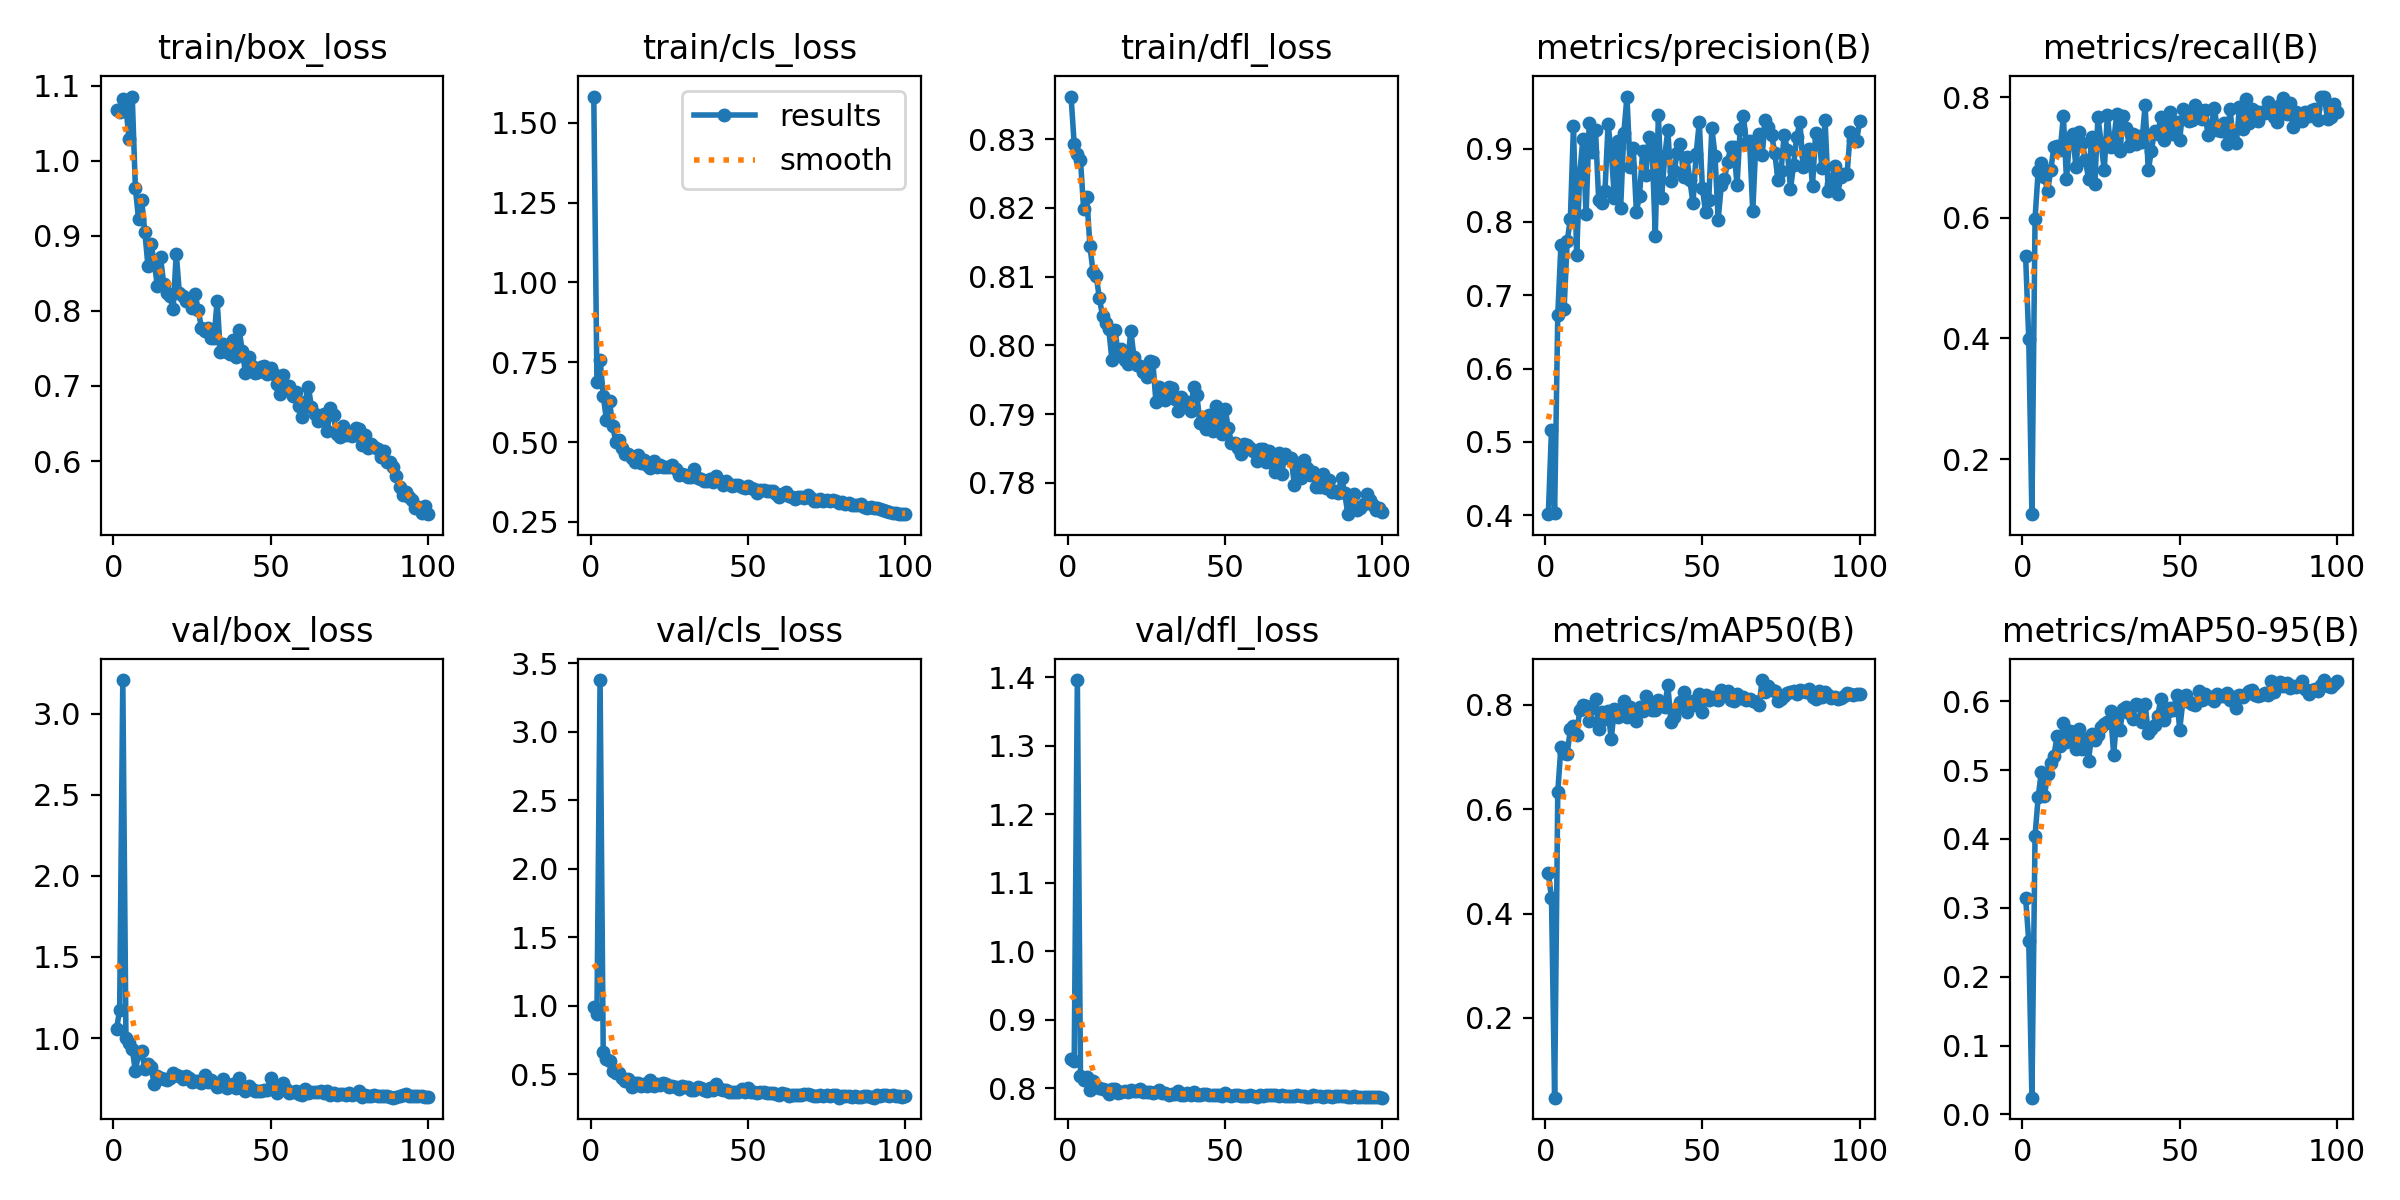

In [16]:
Image("/content/runs/detect/train3/results.png", width=600)

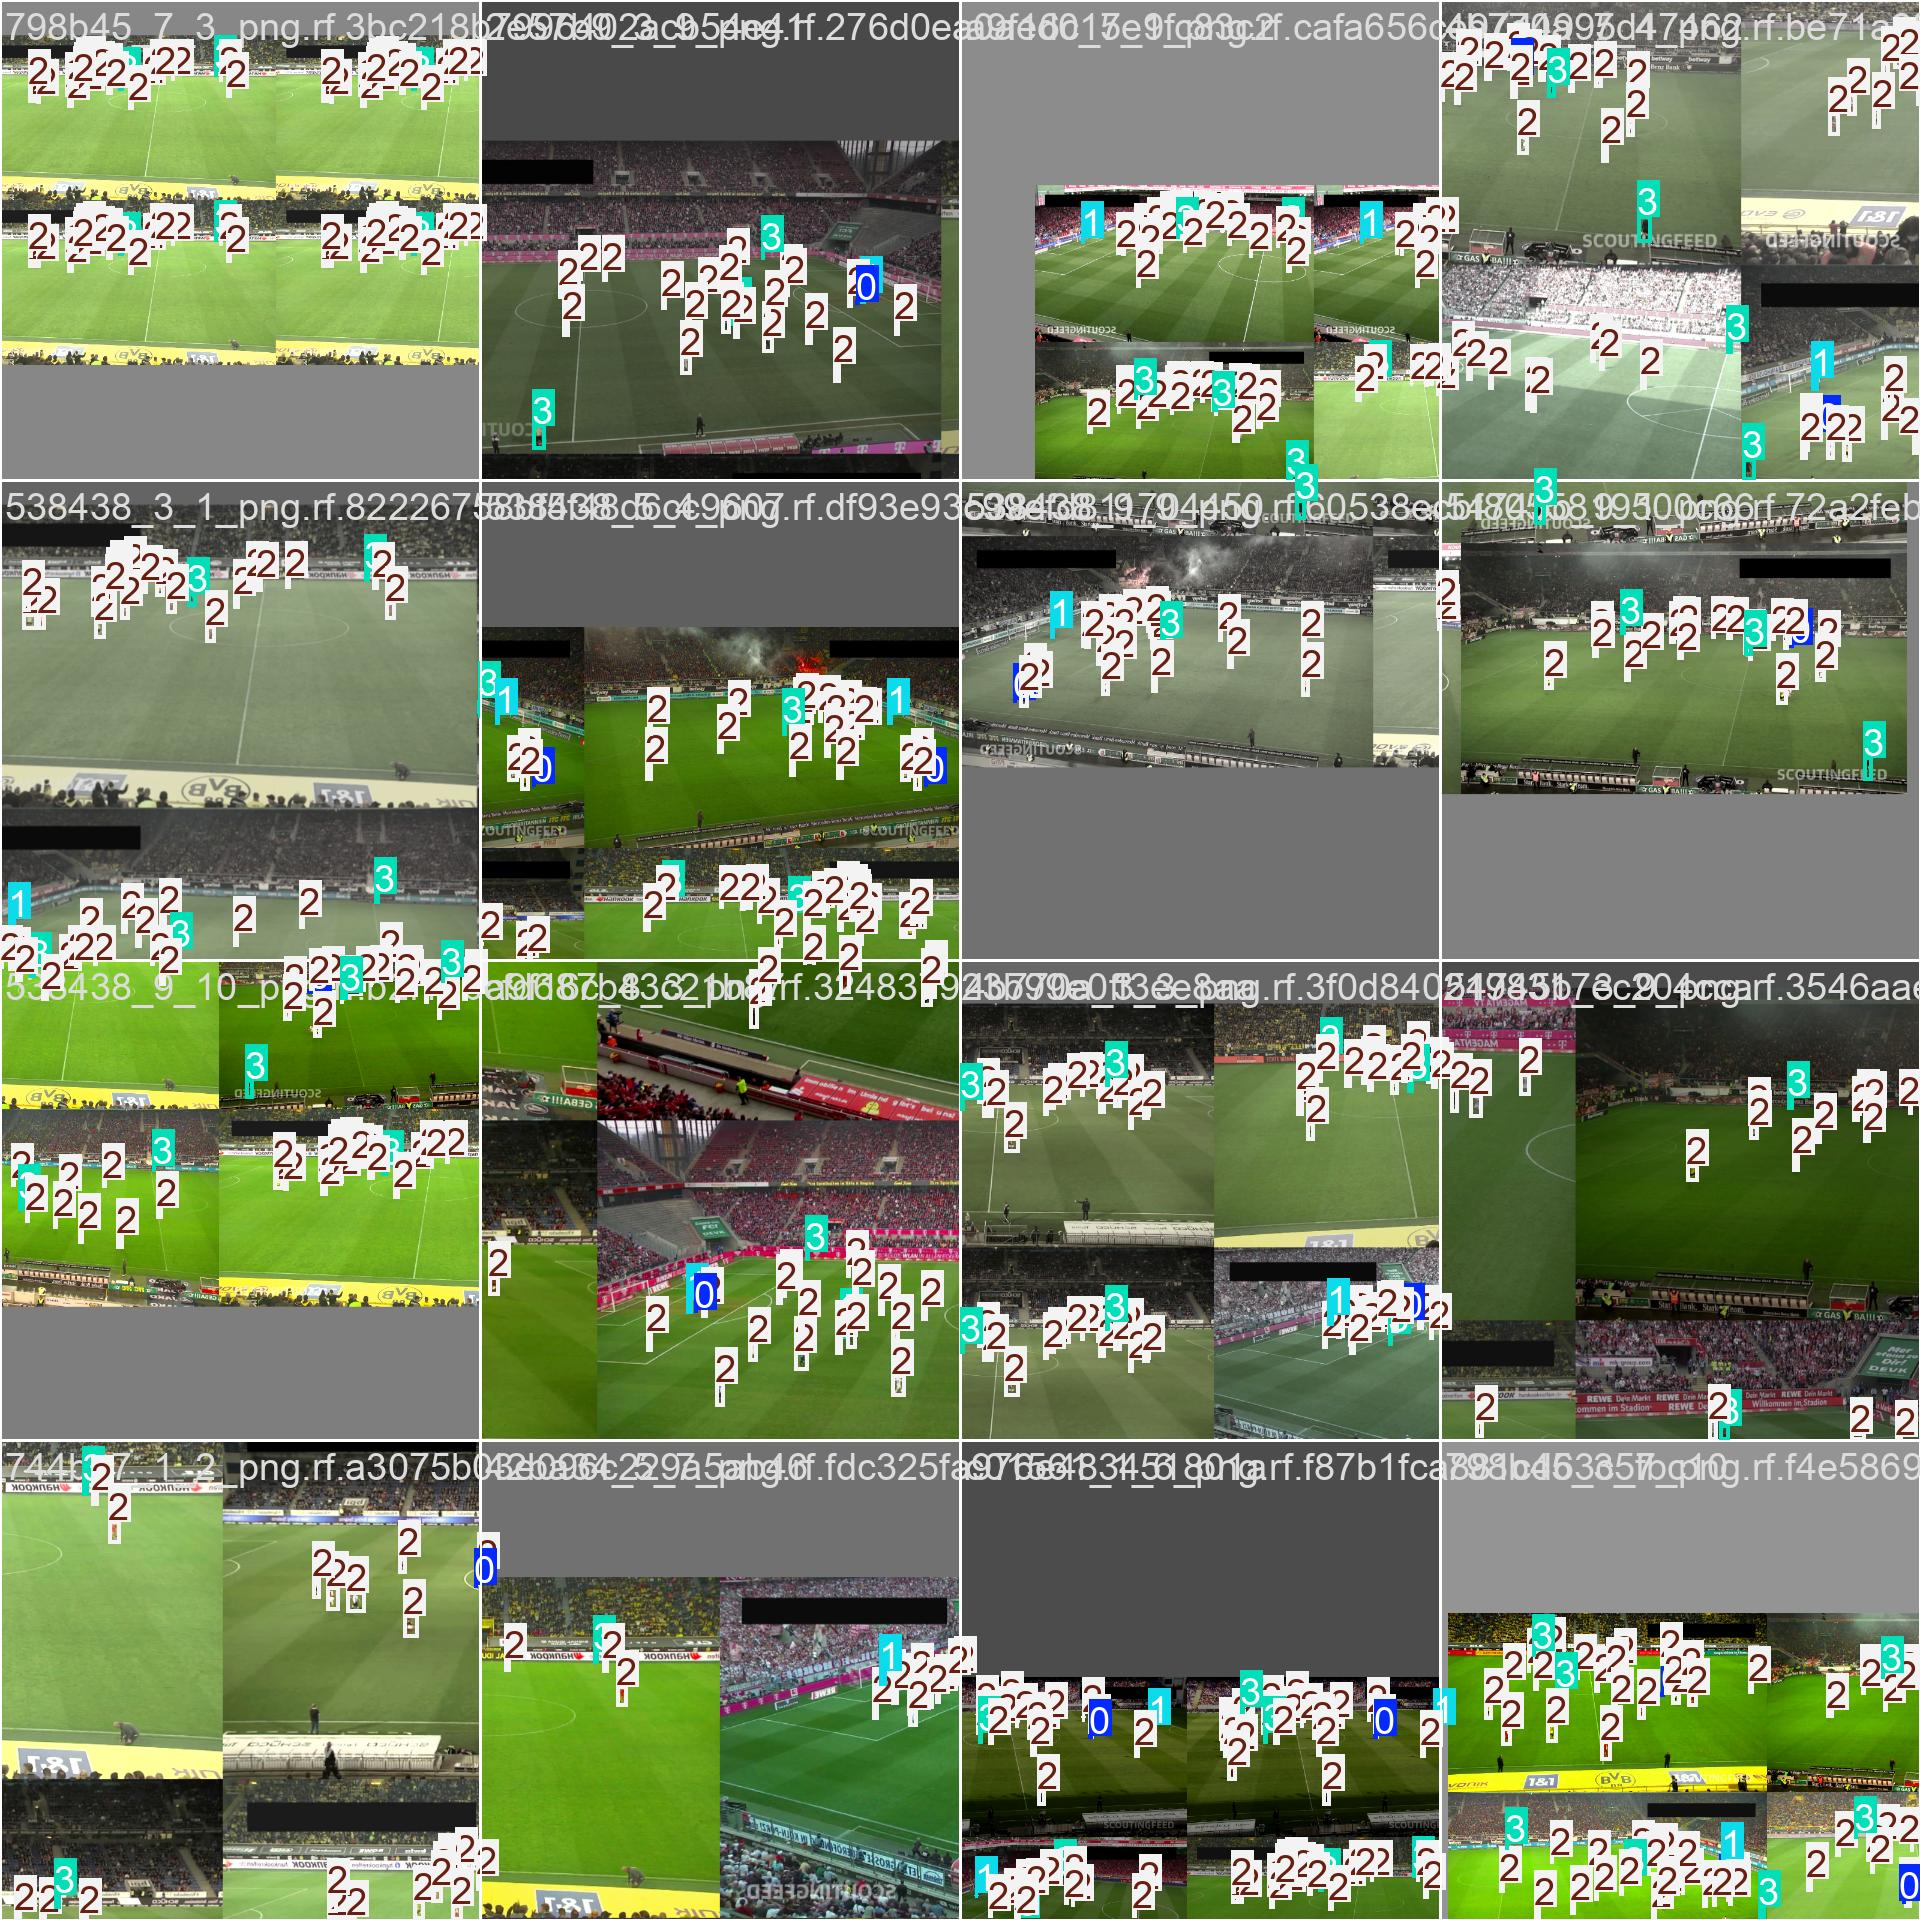

In [17]:
Image("/content/runs/detect/train3/train_batch0.jpg", width=600)

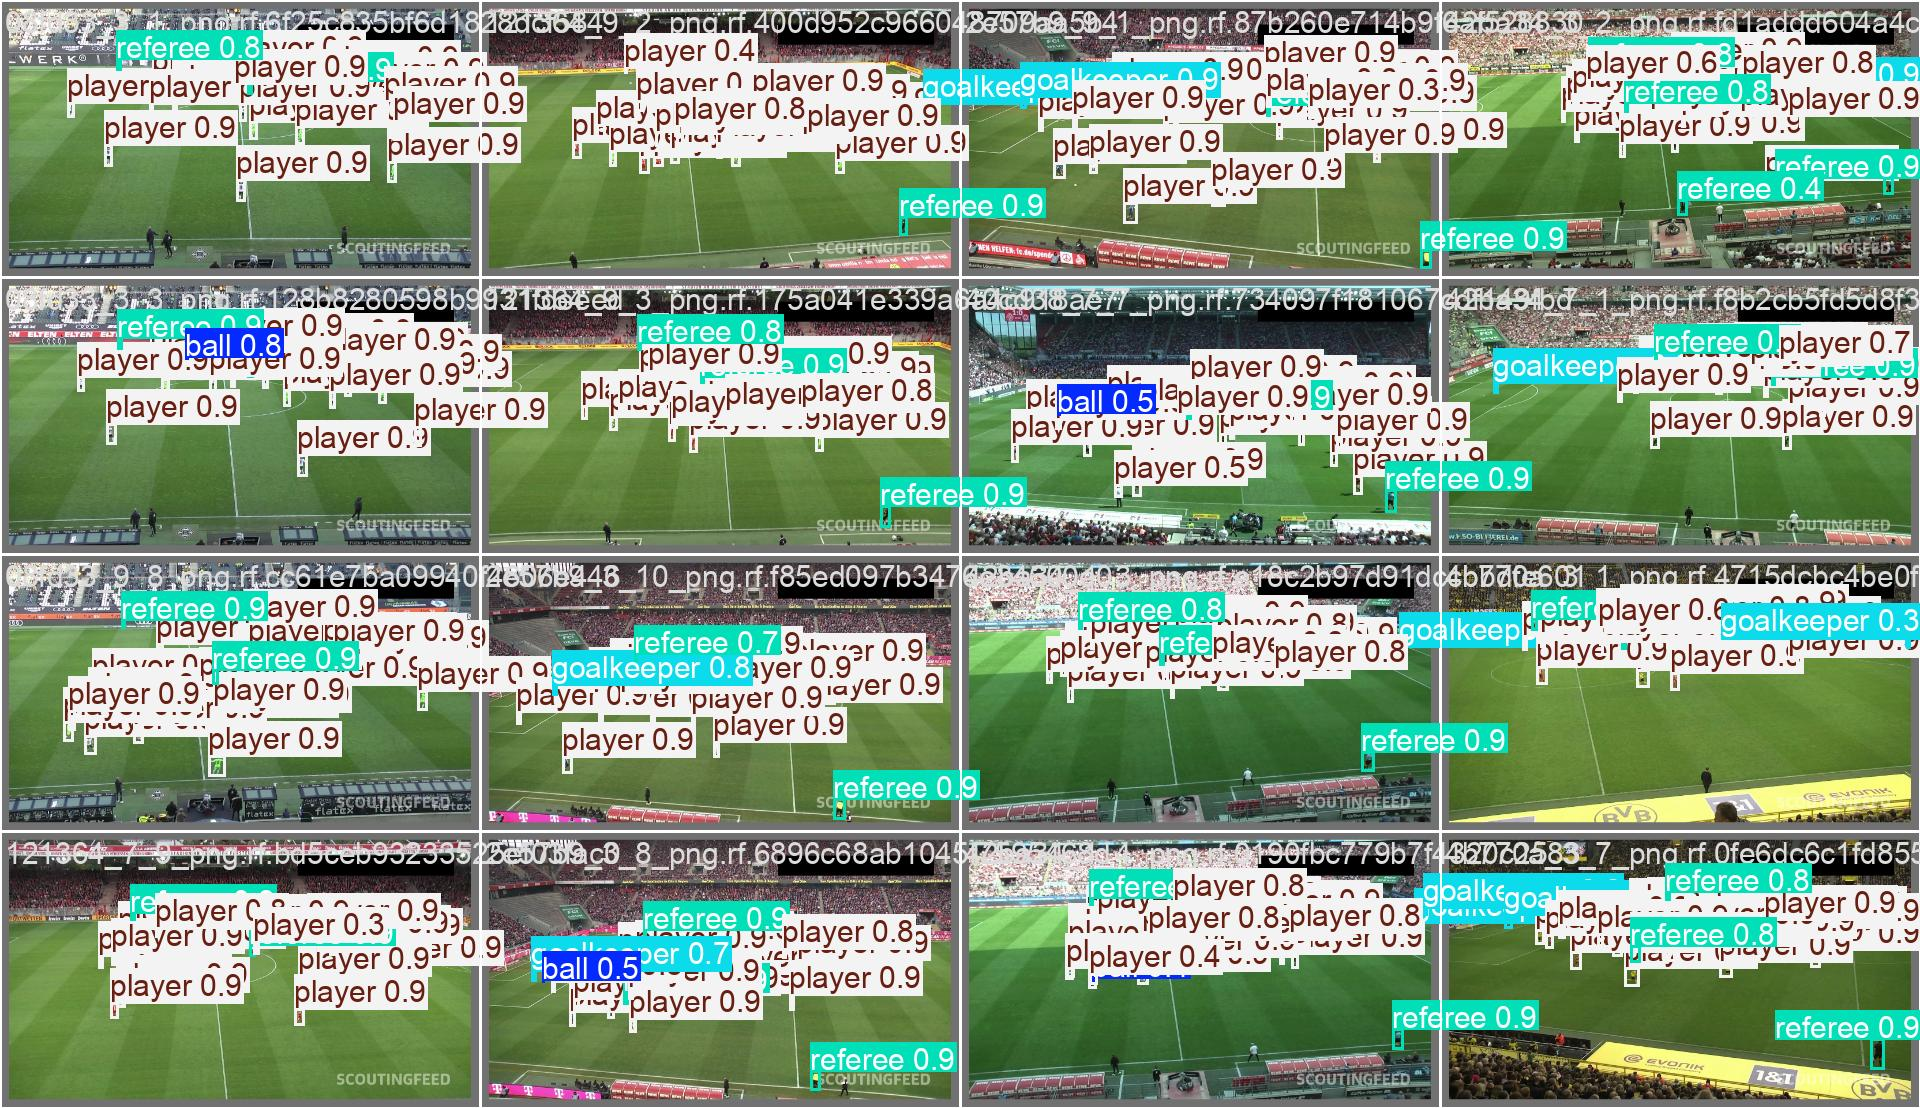

In [19]:
Image("/content/runs/detect/train3/val_batch0_pred.jpg", width=600)

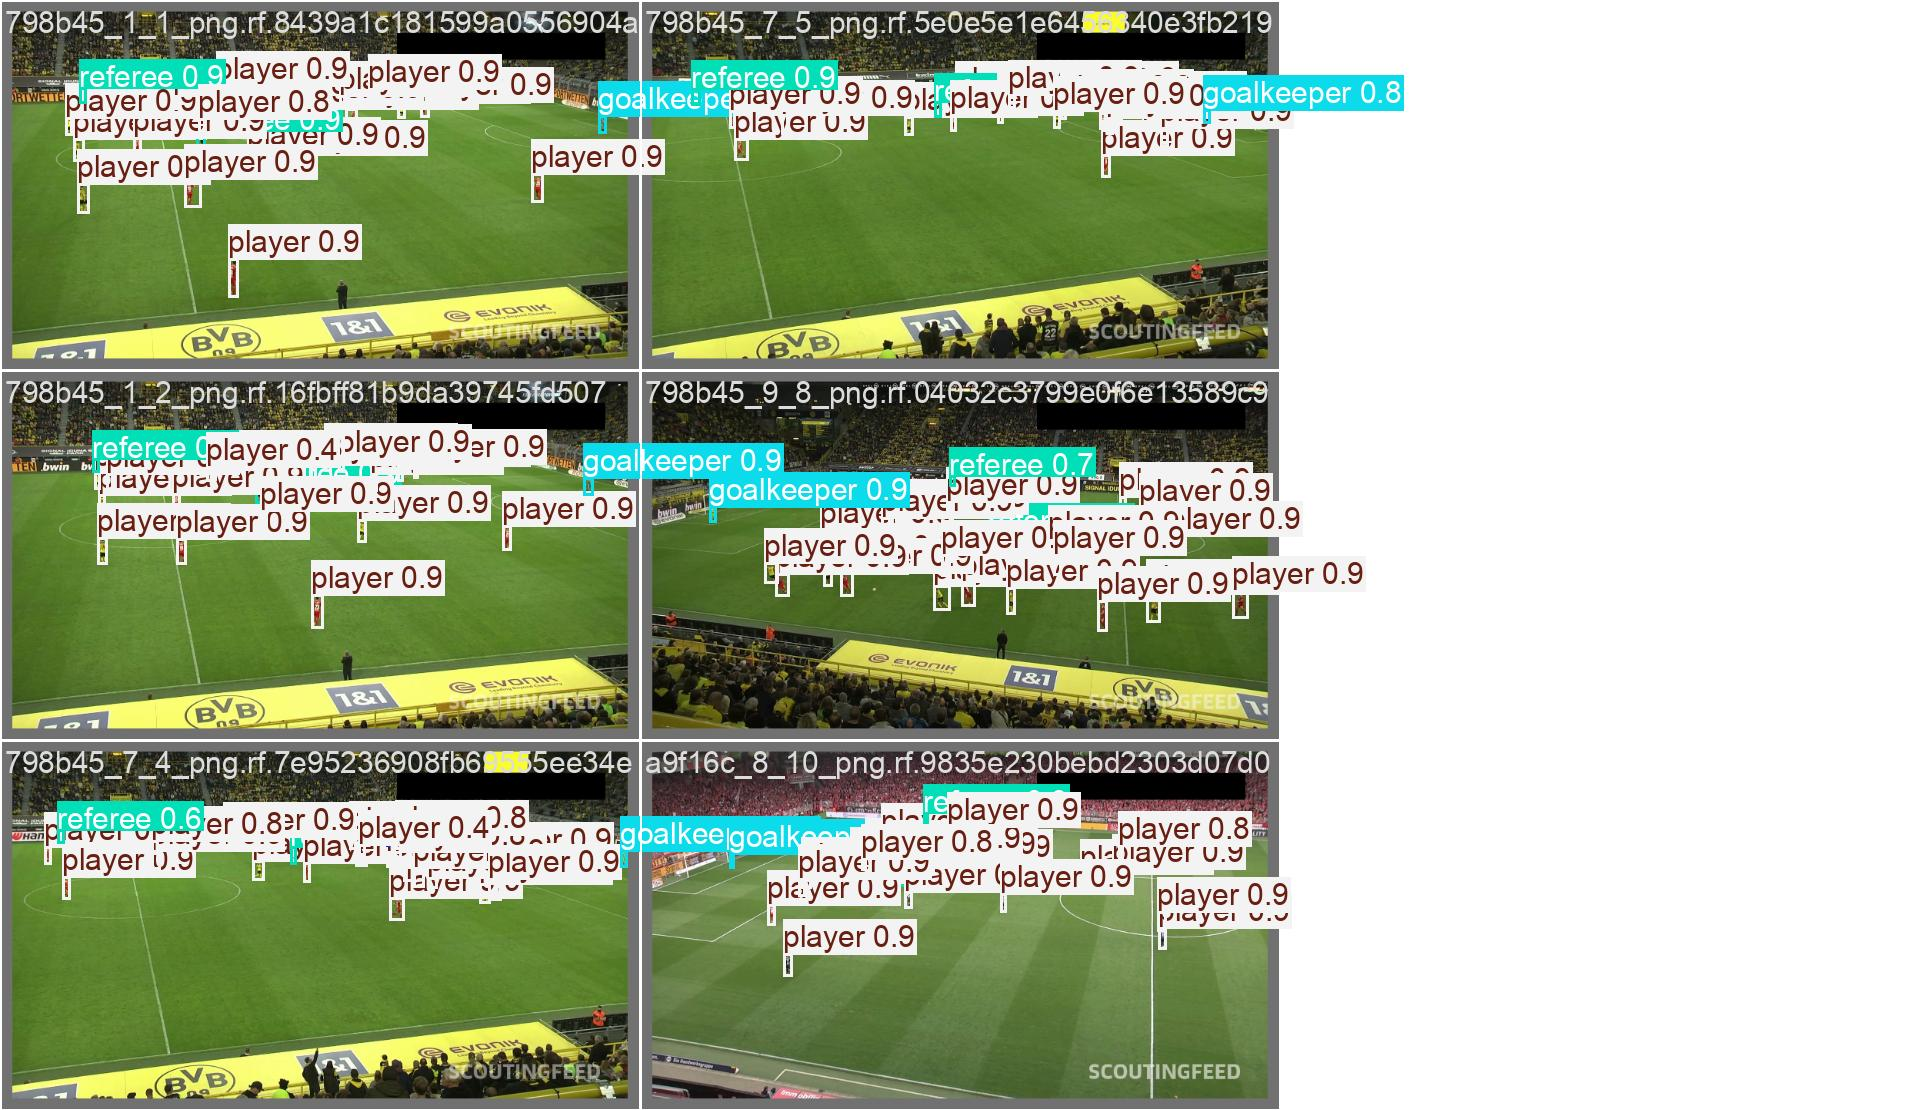

In [20]:
Image("/content/runs/detect/train3/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [21]:
!yolo task=detect mode=val model="/content/runs/detect/train3/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /content/football-players-detection-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.08it/s]
                   all         38        905      0.869      0.801      0.823       0.63
                  ball         35         35      0.741      0.286      0.356      0.161
            goalkeeper         27         27      0.824      0.963      0.962      0.789
                player         38        754      0.966      0.983      0.993      0.844
               referee         38         89      0.945      0.974      0.982      0.725
Speed: 0.3ms preprocess, 27.1ms inference, 0.0ms loss, 26.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn 

**Step # 08 Inference with Custom Model on Images**

In [23]:
!yolo task=detect mode=predict model="/content/runs/detect/train3/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs

image 1/13 /content/football-players-detection-1/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 480x800 1 ball, 20 players, 1 referee, 66.7ms
image 2/13 /content/football-players-detection-1/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 480x800 1 ball, 1 goalkeeper, 20 players, 2 referees, 37.0ms
image 3/13 /content/football-players-detection-1/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 480x800 1 goalkeeper, 19 players, 1 referee, 37.0ms
image 4/13 /content/football-players-detection-1/test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg: 480x800 1 goalkeeper, 20 players, 3 referees, 37.0ms
image 5/13 /content/football-players-detection-1/test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg: 480x800 1 goalkeeper, 20 players, 2

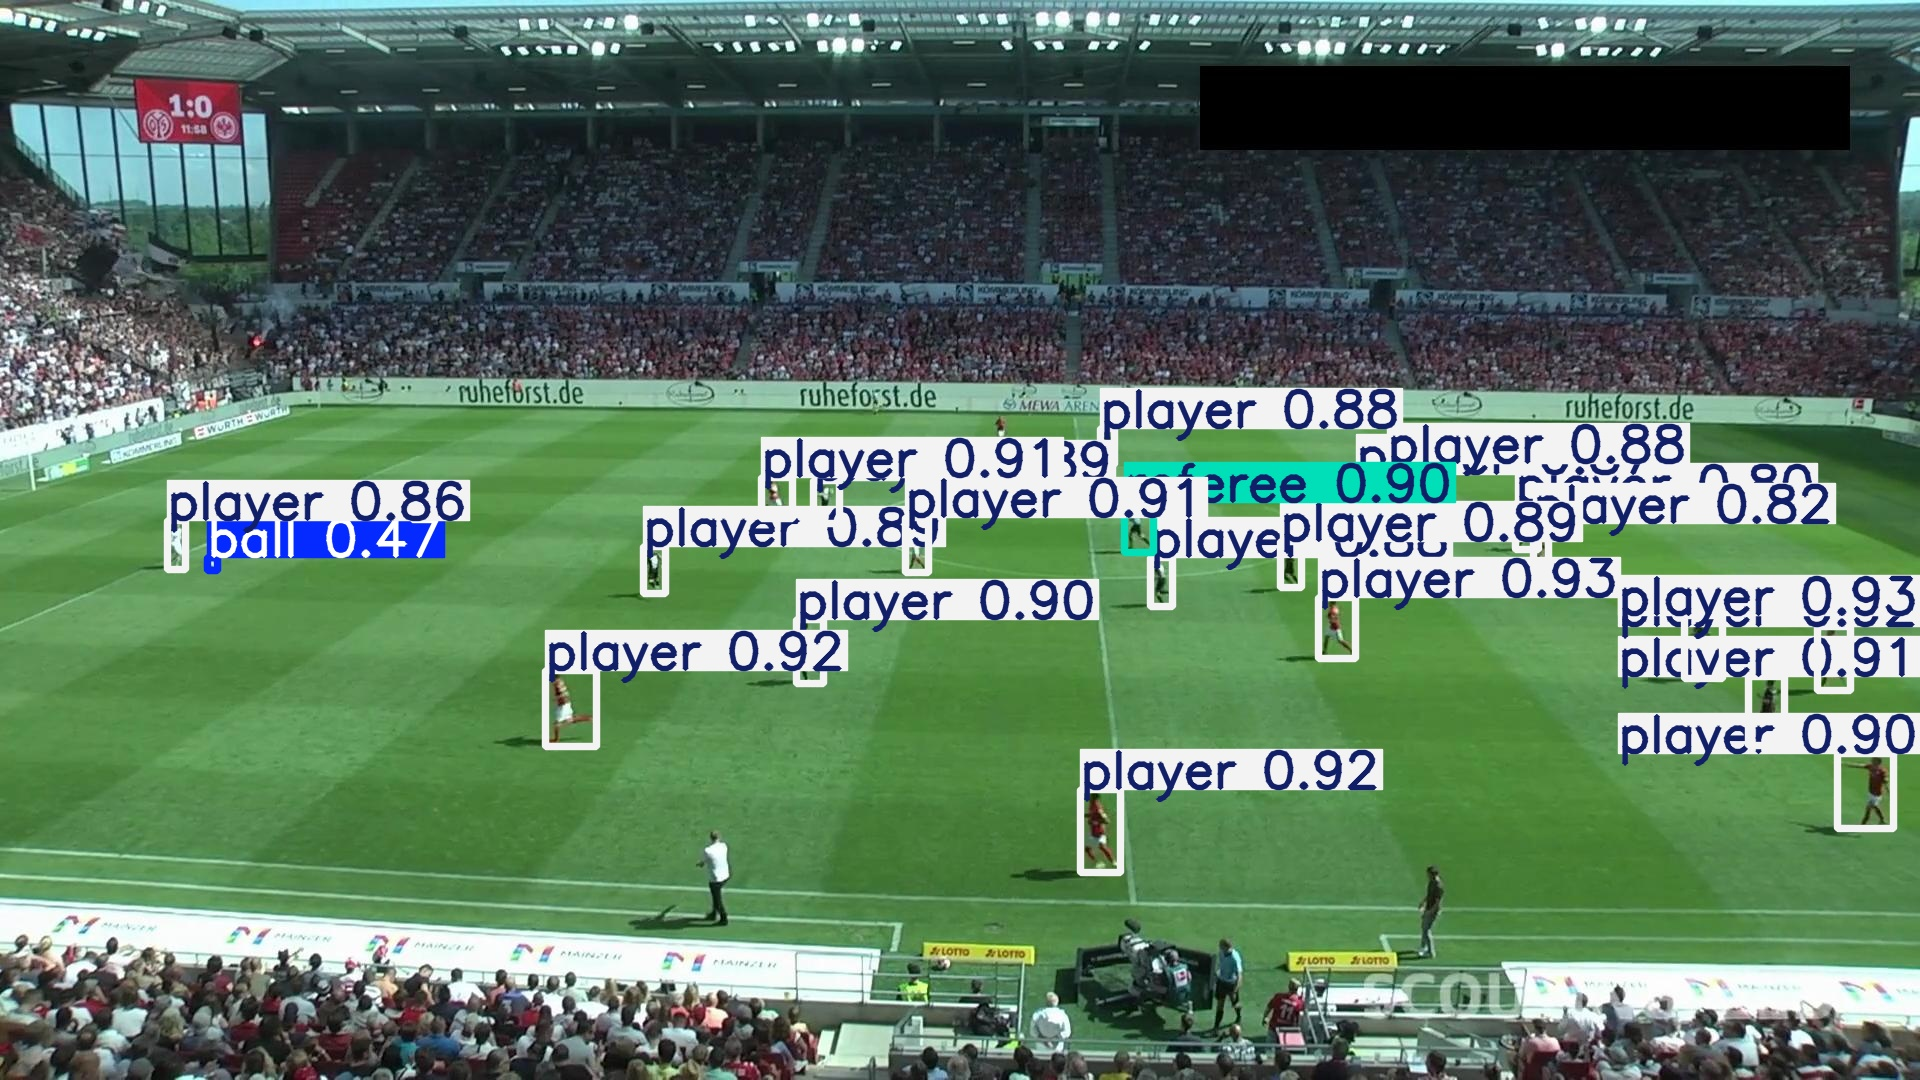

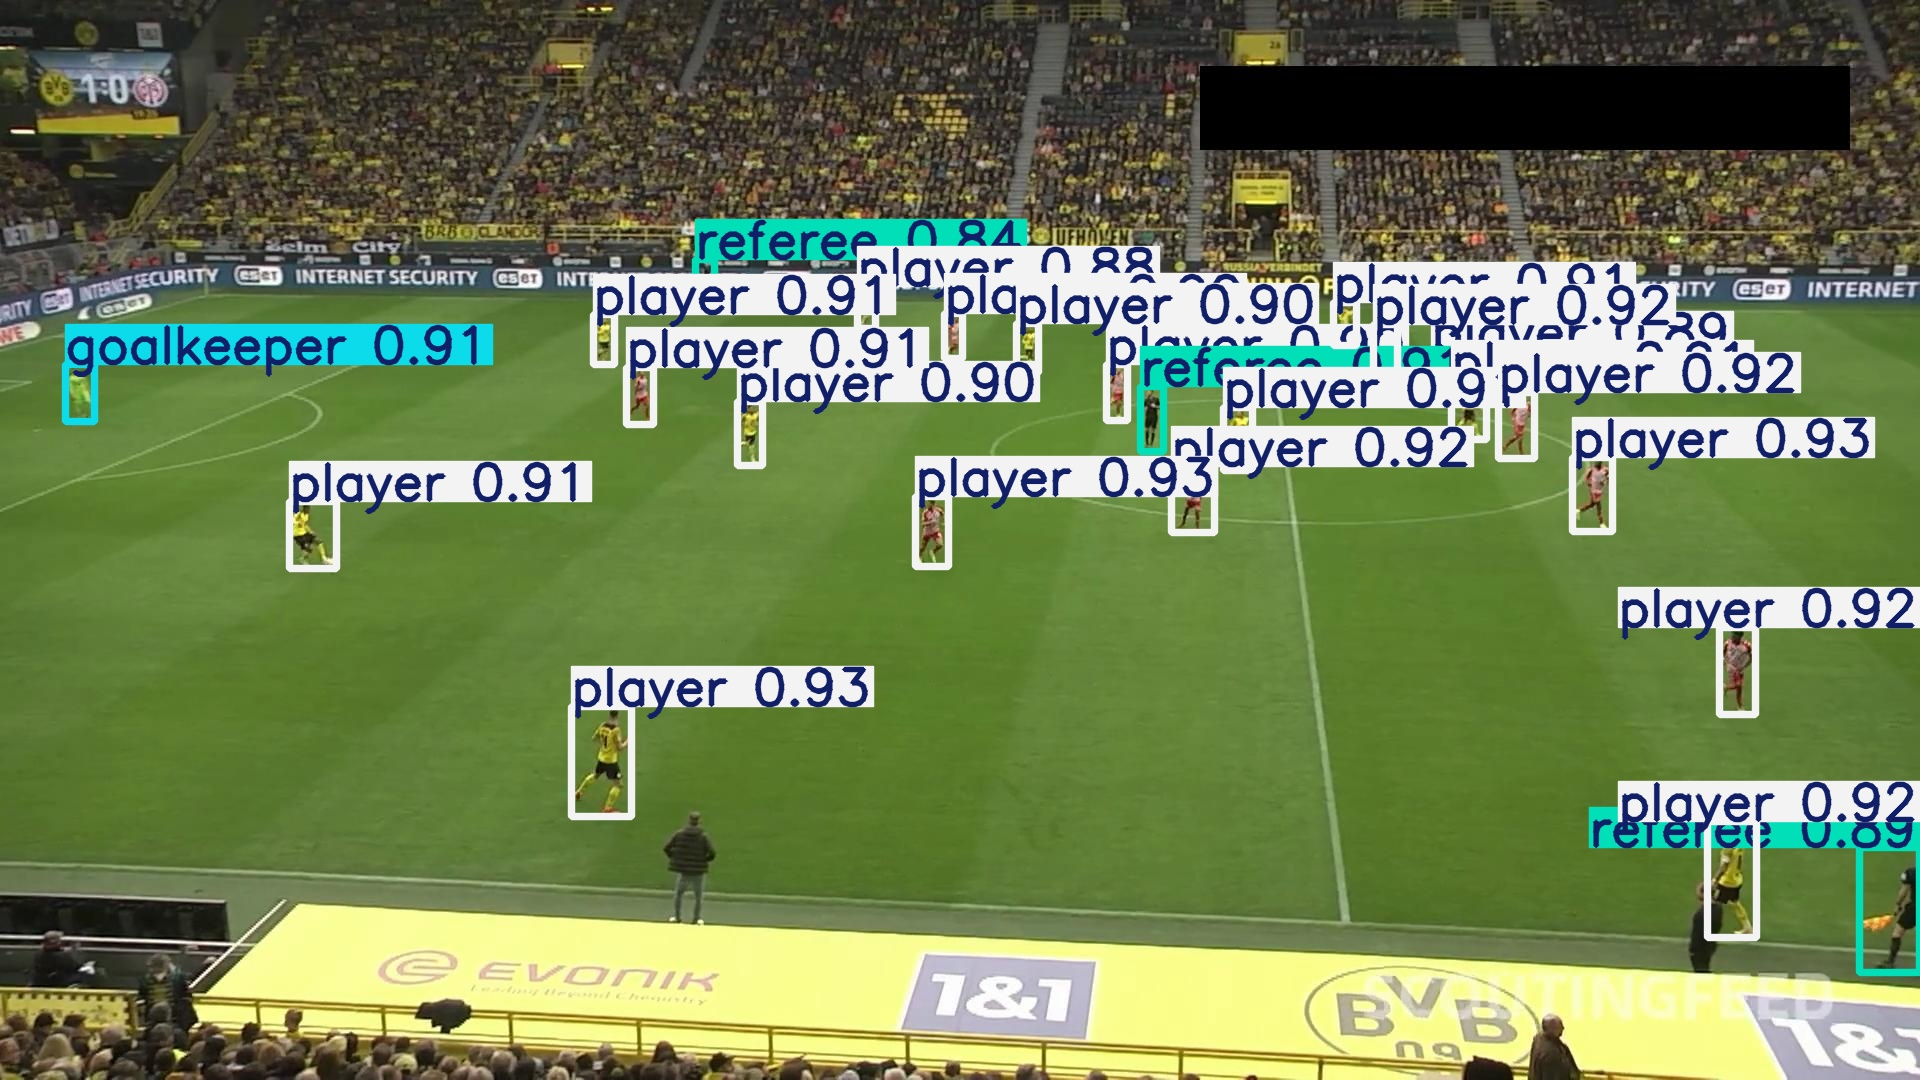

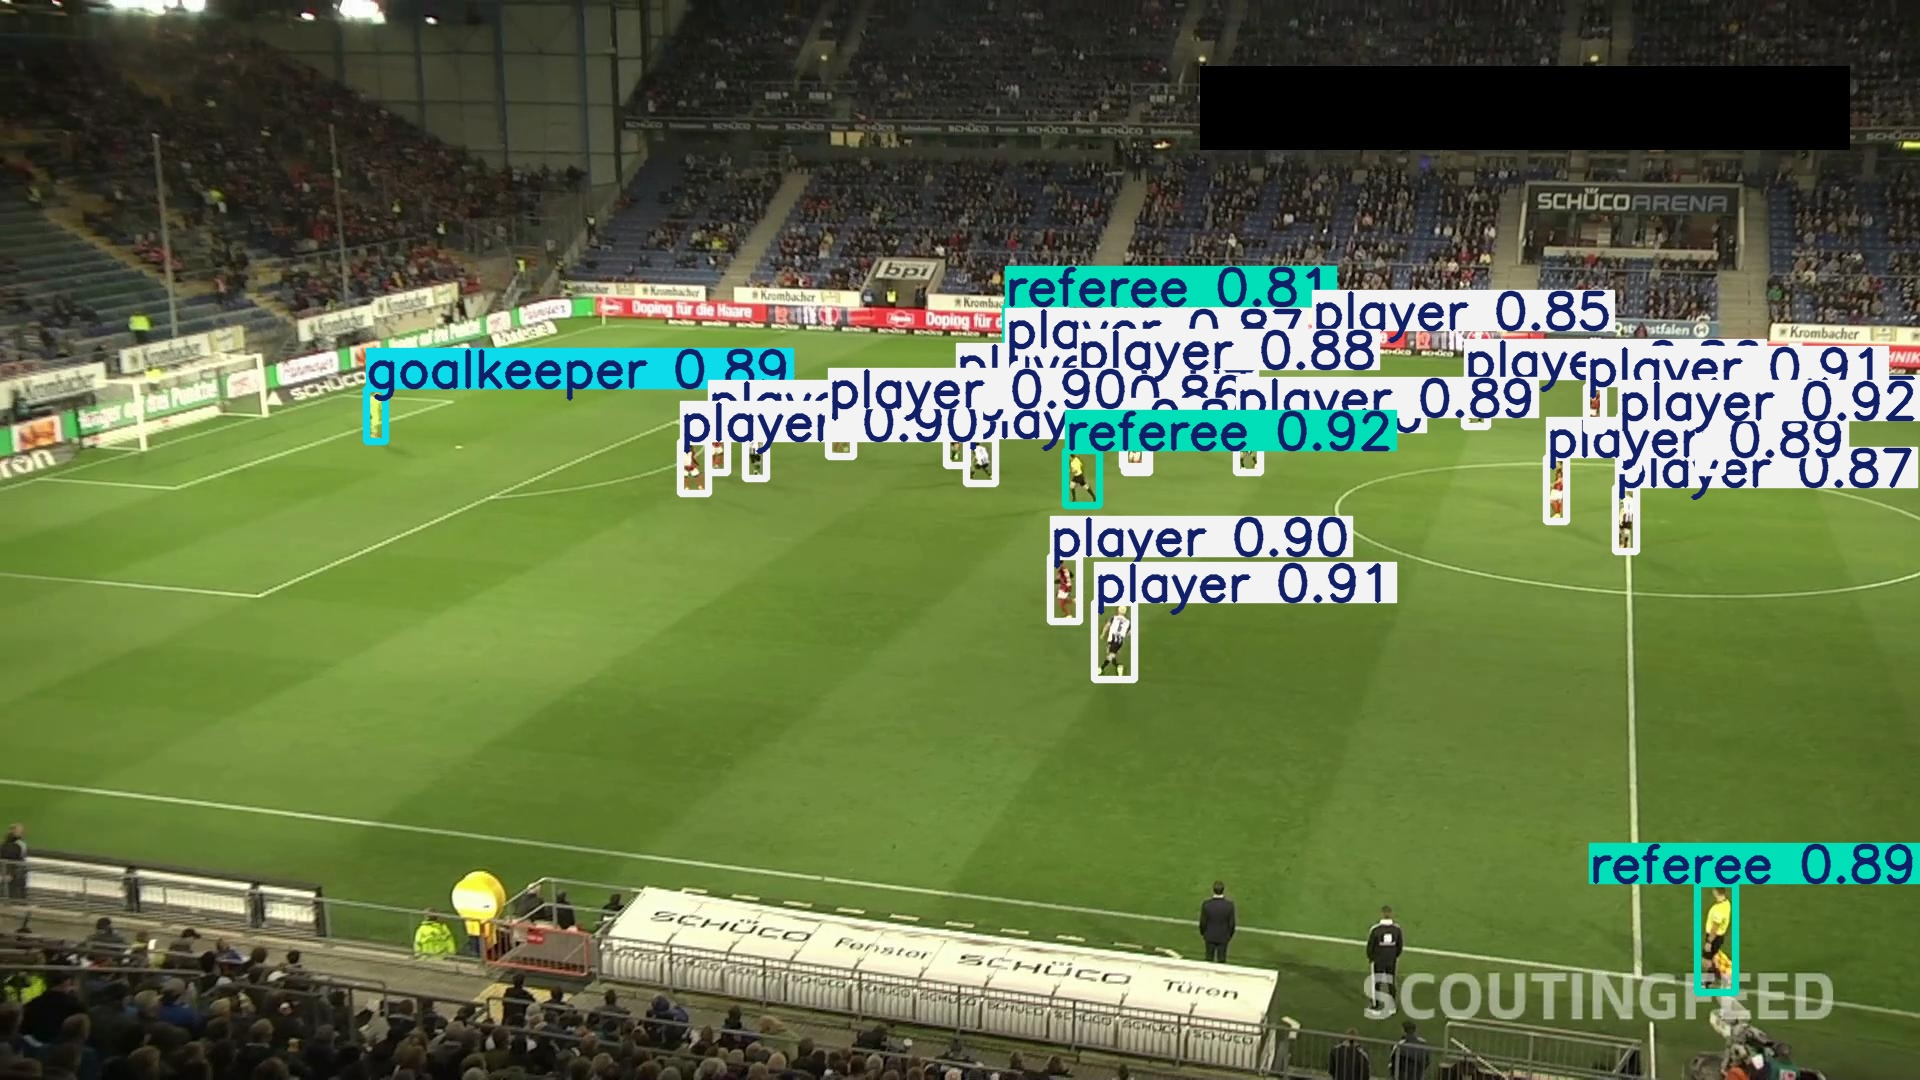

In [24]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")